In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [155]:
cardio=pd.read_excel('Book1.xlsx')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [156]:
cr=cardio.drop('age',axis=1)

In [157]:
co=cardio['age']

In [158]:
co.head()

0    22469
1    14648
2    21901
3    14549
4    23393
Name: age, dtype: int64

In [159]:
cr.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,1,155,69.0,130,80,2,2,0,0,1,0
1,989,1,163,71.0,110,70,1,1,0,0,1,1
2,990,1,165,70.0,120,80,1,1,0,0,1,0
3,991,2,165,85.0,120,80,1,1,1,1,1,0
4,992,1,155,62.0,120,80,1,1,0,0,1,0


In [160]:
c=co//365

In [161]:
c.head()

0    61
1    40
2    60
3    39
4    64
Name: age, dtype: int64

In [162]:
conc=pd.concat([cr,c],axis=1)

In [163]:
conc.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
0,988,1,155,69.0,130,80,2,2,0,0,1,0,61
1,989,1,163,71.0,110,70,1,1,0,0,1,1,40
2,990,1,165,70.0,120,80,1,1,0,0,1,0,60
3,991,2,165,85.0,120,80,1,1,1,1,1,0,39
4,992,1,155,62.0,120,80,1,1,0,0,1,0,64


In [164]:
conc.shape

(69301, 13)

In [165]:
conc.tail()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
69296,99993,2,168,76.0,120,80,1,1,1,0,1,0,52
69297,99995,1,158,126.0,140,90,2,2,0,0,1,1,61
69298,99996,2,183,105.0,180,90,3,1,0,1,0,1,52
69299,99998,1,163,72.0,135,80,1,2,0,0,0,1,61
69300,99999,1,170,72.0,120,80,2,1,0,0,1,0,56


In [166]:
conc.dtypes

id               int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age              int64
dtype: object

In [167]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
 12  age          69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [168]:
conc.keys()

Index(['id', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age'],
      dtype='object')

In [233]:
conc.isnull().sum()

id             0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age            0
dtype: int64

In [234]:
conc.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,1.349519,5.100773,4.289047,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,52.840681
std,28563.100347,0.476821,0.051765,0.187045,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,6.766685
min,988.000000,1.000000,4.007333,2.302585,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25745.000000,1.000000,5.068904,4.174387,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50494.000000,1.000000,5.105945,4.276666,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,75150.000000,2.000000,5.135798,4.406719,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,5.521461,5.298317,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


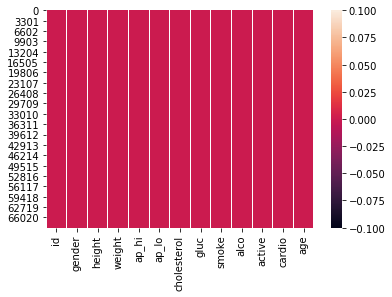

In [170]:
sns.heatmap(conc.isnull())

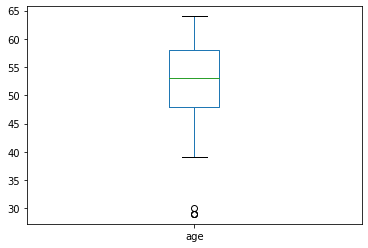

In [171]:
conc['age'].plot.box()

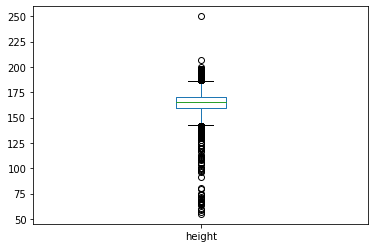

In [172]:
conc['height'].plot.box()

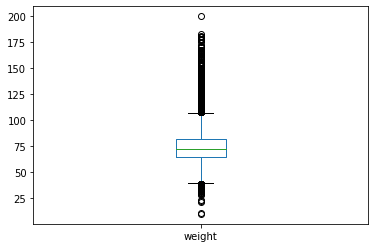

In [173]:
conc['weight'].plot.box()

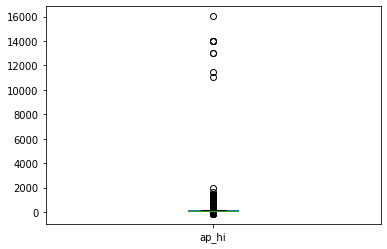

In [174]:
conc['ap_hi'].plot.box()

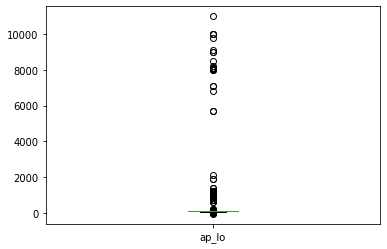

In [175]:
conc['ap_lo'].plot.box()

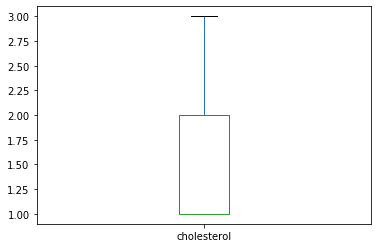

In [176]:
conc['cholesterol'].plot.box()

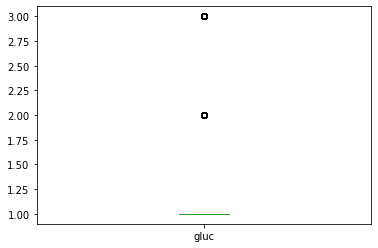

In [177]:
conc['gluc'].plot.box()

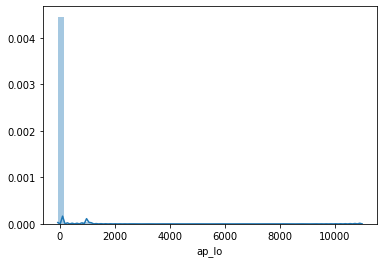

In [178]:
sns.distplot(conc['ap_lo'])

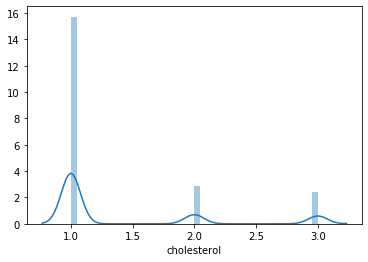

In [179]:
sns.distplot(conc['cholesterol'])

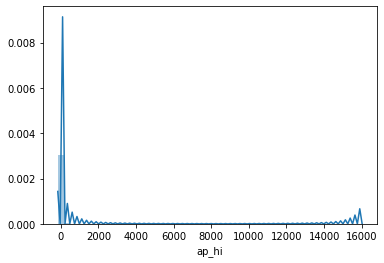

In [180]:
sns.distplot(conc['ap_hi'])

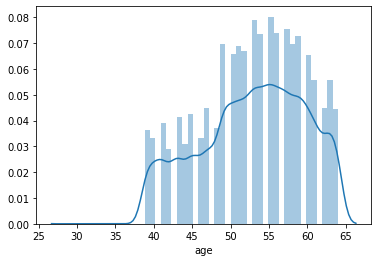

In [181]:
sns.distplot(conc['age'])

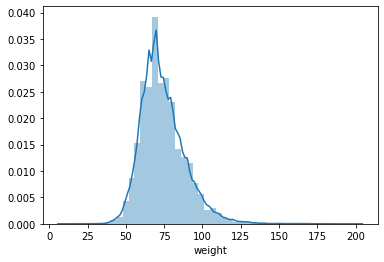

In [182]:
sns.distplot(conc['weight'])

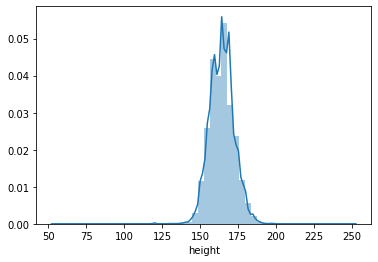

In [183]:
sns.distplot(conc['height'])

In [184]:
from scipy.stats import boxcox

In [185]:
conc['height']=boxcox(conc['height'],0)

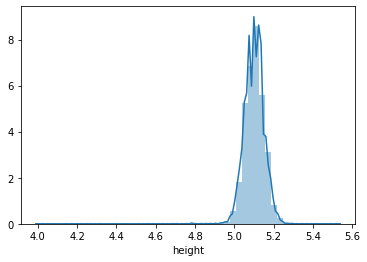

In [186]:
sns.distplot(conc['height'])

In [187]:
conc['weight']=boxcox(conc['weight'],0)

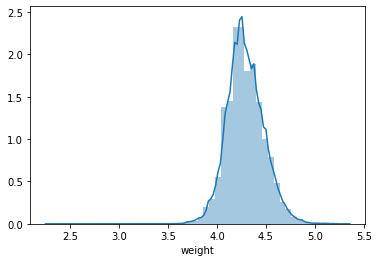

In [188]:
sns.distplot(conc['weight'])

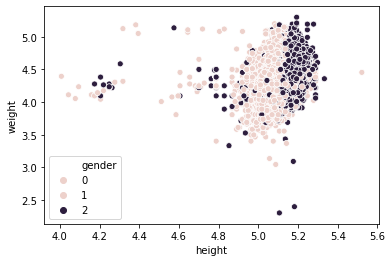

In [189]:
sns.scatterplot(x='height',y='weight',hue='gender',data=conc)

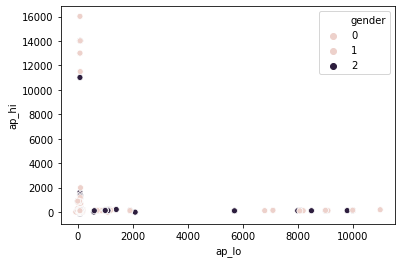

In [190]:
sns.scatterplot(x='ap_lo',y='ap_hi',hue='gender',data=conc)

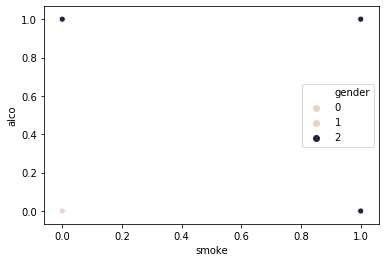

In [191]:
sns.scatterplot(x='smoke',y='alco',hue='gender',data=conc)

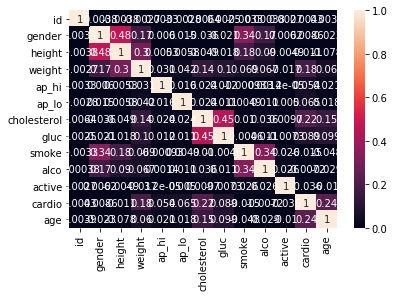

In [192]:
sns.heatmap(conc.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(conc)

In [194]:
x=conc[['gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','age']].copy()
y=conc['cardio']

In [195]:
x.shape

(69301, 11)

In [196]:
y.shape

(69301,)

In [197]:
y=y.values.reshape(-1,1)

In [198]:
y.shape

(69301, 1)

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

In [200]:
x_train.shape

(48510, 11)

In [201]:
x_test.shape

(20791, 11)

In [202]:
y_train.shape

(48510, 1)

In [203]:
y_test.shape

(20791, 1)

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
lm=LinearRegression()

In [206]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
lm.coef_

array([[ 1.38450606e-02, -3.54311934e-01,  4.28187787e-01,
         1.54117471e-04,  1.94283652e-04,  1.31836242e-01,
        -2.54473440e-02, -1.88892124e-02, -3.78582521e-02,
        -3.92754460e-02,  1.46984187e-02]])

In [208]:
lm.intercept_

array([-0.47733854])

In [209]:
lm.score(x_train,y_train)

0.12408442933613029

In [210]:
pred=lm.predict(x_test)
print('predicate result:',pred)
print('actual price',y_test)

predicate result: [[0.50361161]
 [0.48408675]
 [0.39464073]
 ...
 [0.40851865]
 [0.5444045 ]
 [0.41533002]]
actual price [[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [211]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [212]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 0.44106807764809436
mean square error 0.22230086850214514
rooot mean square error 0.471487930388621


In [213]:
from sklearn.metrics import r2_score
print('R2 score ',r2_score(y_test,pred))

R2 score  0.11079198188672068


In [214]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [215]:
from sklearn.metrics import confusion_matrix

In [216]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(pred)    # initialise a matrix full with zeros
y_pred_classes[pred > cutoff] = 1 

In [217]:
y_test_classes = np.zeros_like(pred)
y_test_classes[y_test > cutoff] = 1

In [218]:
confusion_matrix(y_test_classes, y_pred_classes)

array([[9729,  643],
       [8259, 2160]], dtype=int64)

In [219]:
score=cross_val_score(lm,x,y,cv=5,scoring='neg_mean_squared_error')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(lm,x,y,cv=5)
print('prediction \n',y_pred)


score of mean 
 -0.22018691739658108
score of standard devition 
 0.00154275612766623
prediction 
 [[0.67068036]
 [0.24194582]
 [0.5298926 ]
 ...
 [0.84346492]
 [0.57371348]
 [0.60500876]]


In [220]:
from sklearn.tree import DecisionTreeRegressor 

In [221]:
def dtcker(cer):
    dtc=DecisionTreeRegressor(criterion=cer,max_depth=5,min_samples_split=5,
                           max_leaf_nodes=10,random_state = 0) 
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    print(' prediction \n',pred)
    dtc.fit(x,y)
    print("R-Squared on train dataset={}".format(dtc.score(x_test,y_test)))
    dtc.fit(x_test,y_test)   
    print("R-Squaredon test dataset={}".format(dtc.score(x_test,y_test)))
    print('error')
    print("mean absolute error:",mean_absolute_error(y_test,pred))
    print("mean square error",mean_squared_error(y_test,pred))
    print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score',r2_score(y_test,pred))

In [222]:
dtcker('mse')

 prediction 
 [0.40007368 0.55116765 0.26201354 ... 0.26201354 0.55116765 0.26201354]
R-Squared on train dataset=0.26095010485361314
R-Squaredon test dataset=0.26141066665238744
error
mean absolute error: 0.36949166446178466
mean square error 0.18522846274697916
rooot mean square error 0.4303817639572792
r2_score 0.25908236271321017


In [223]:
dtcker('friedman_mse')

 prediction 
 [0.40007368 0.55116765 0.26201354 ... 0.26201354 0.55116765 0.26201354]
R-Squared on train dataset=0.26095010485361314
R-Squaredon test dataset=0.26141066665238744
error
mean absolute error: 0.36949166446178466
mean square error 0.18522846274697916
rooot mean square error 0.4303817639572792
r2_score 0.25908236271321017


In [227]:
from sklearn.neighbors import KNeighborsRegressor

In [228]:
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [229]:
pred=knn.predict(x_test)

In [236]:
print(pred)

[[0.6]
 [0.8]
 [0.2]
 ...
 [0.2]
 [0.6]
 [0.2]]


In [237]:
from sklearn.ensemble import RandomForestRegressor

In [239]:
lr = RandomForestRegressor(n_estimators=50)
lr.fit(x_train, y_train)

print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

Training set score: 0.85
Test set score: 0.17


In [ ]:
from sklearn.externals import joblib
joblib.dump(knn,'cardio.pkl')